In [2]:
function myinner(a::AbstractVector{T},b::AbstractVector{T}) where T
    s = zero(T)
    @inbounds for i in eachindex(a)
        s += a[i] * b[i]
    end
    return s
end

myinner (generic function with 1 method)

In [3]:
x = rand(10)
y = rand(10);

In [4]:
myinner(x,y)

1.297631856968682

In [5]:
using PyCall

In [6]:
np = pyimport("numpy");

In [7]:
np.inner(x,y)

1.297631856968682

Entrypoint of `np.inner`: https://github.com/numpy/numpy/blob/cb557b79fa0ce467c881830f8e8e042c484ccfaa/numpy/core/multiarray.py#L244

Reroute: https://github.com/numpy/numpy/blob/cb557b79fa0ce467c881830f8e8e042c484ccfaa/numpy/core/src/multiarray/multiarraymodule.c#L4177

Another reroute: https://github.com/numpy/numpy/blob/cb557b79fa0ce467c881830f8e8e042c484ccfaa/numpy/core/src/multiarray/multiarraymodule.c#L2314

Almost there: https://github.com/numpy/numpy/blob/cb557b79fa0ce467c881830f8e8e042c484ccfaa/numpy/core/src/multiarray/multiarraymodule.c#L872

Finally (sort of, it calls into CBLAS): https://github.com/numpy/numpy/blob/cb557b79fa0ce467c881830f8e8e042c484ccfaa/numpy/core/src/multiarray/multiarraymodule.c#L963

In [8]:
using BenchmarkTools, Plots
ns = exp10.(range(1, 6, length=30));

tnp = Float64[]
tjl = Float64[]
for n in ns
    x = 1:n |> collect
    y = 1:n |> collect
    push!(tnp, @belapsed np.inner($x, $y) samples=4 evals=1)
    push!(tjl, @belapsed myinner($x, $y) samples=4 evals=1)
end;
println("Benchmark done!")

Benchmark done!


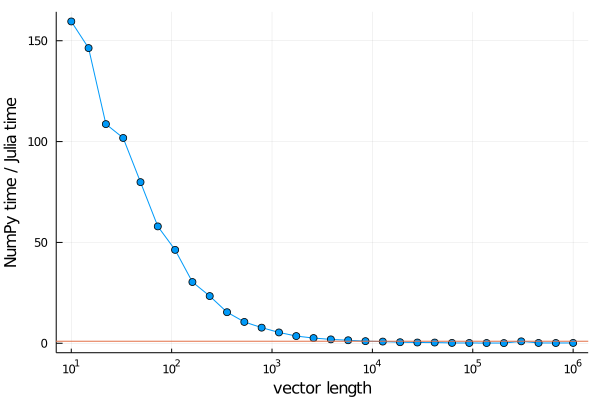

In [9]:
p = plot(ns, tnp./tjl, m=:circle, xscale=:log10, xlab="vector length", ylab="NumPy time / Julia time", legend=:false)
hline!(p, [1])

In [10]:
myinner([1,2,3], [4,5,6])

32

In [11]:
myinner([1.2,3.4,5.6], [7.8,9.1,10.2])

97.41999999999999